# Stroop Test

## Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition. The illustration for our words is listed below:

In [34]:
#Place dataset in current working directory
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

path = r'~/Downloads/datasets/stroopdata.csv'
data = pd.read_csv(path)
data_diff = pd.DataFrame(data['Congruent']-data['Incongruent'])
display(data.head())

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


## Questions

#### 1. Independent and Dependent Variables

- Independent variable is whether the word and word color are same or not.

- Dependent variable: response time (in seconds) for congruent and non-congruent words.

#### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

1. **Set of hypotheses**
    - The null hypothesis $H_0$ is the mean population react time of congruent group is not signicicantly smaller than the incongurent group, namely $u_1 >= u_2$.
    - The alternate hypothesis $H_1$ is the mean population react time of congruent group is signicicantly smaller than the incongurent group, namely $u_1 < u_2$.
    - $u_1$ is the mean population react time of congruent group, $u_2$ is the mean population react time of incongruent group.

2. **Statistical test**
    - The t test for dependent means is choosen, it's an one-tailed test in negative zone.
    - The z test is not suitable as the mean value and standard deviation of population are unknown for small sample size.
    
3. **Statistical assumptions**
    - Each observation of the dependent variable is independent of the other observations of the dependent variable 
    - Dependent variable has a normal distribution, with the same variance in each group
    - The dependent variable is continuous

#### 3. Report some descriptive statistics regarding this dataset. 

In [16]:
#Separate congruent and incongruent data
print("\nStatistics of Data")
display(data.describe())
print("\nStatistics of data difference b/w Congruent and Non-Congruent Data")
display(data_diff.describe())


Statistics of Data


,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000



Statistics of data difference b/w Congruent and Non-Congruent Data


,0
count,24.000000
mean,-7.964792
std,4.864827
min,-21.919000
25%,-10.258500
50%,-7.666500
75%,-3.645500
max,-1.950000


#### 4. Data visualisation

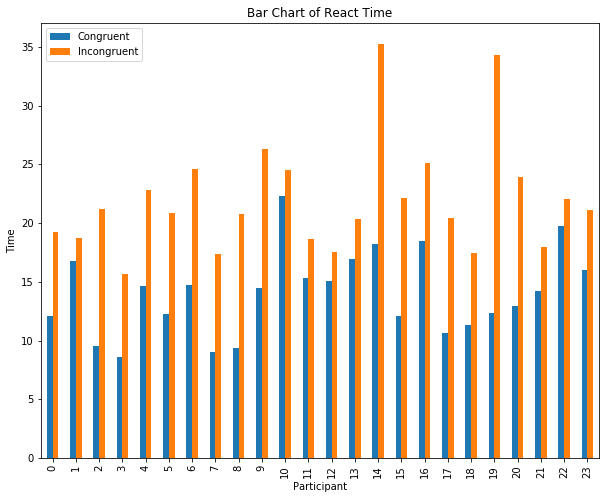

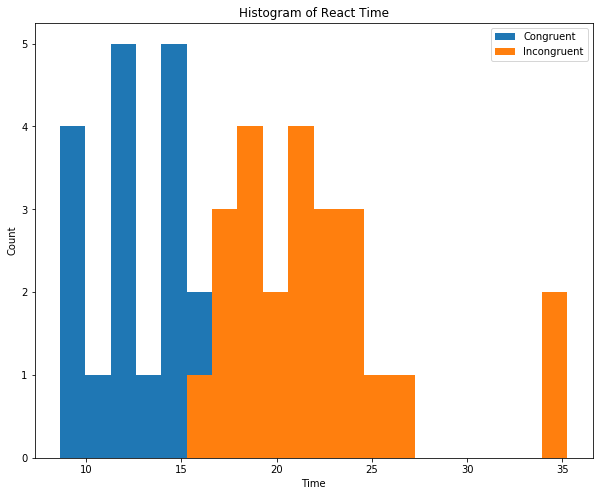

In [30]:
plt.rcParams['figure.figsize'] = 10, 8

#Bar Chart
fig = data.plot.bar()
fig.set_title('Bar Chart of React Time')
fig.set_xlabel('Participant')
_ = fig.set_ylabel('Time')

#Histogram
fig = data.plot.hist(bins=20)
fig.set_title('Histogram of React Time')
fig.set_xlabel('Time')
_ = fig.set_ylabel('Count')

__Observation__: The bar chart and histogram, we could inference that the response time for congruent words is shorter than non-congruent words.

### 5 Perform the statistical test and report your results. 

In [35]:
# t-test for two groups of dependent data
ttest = stats.ttest_rel(data['Congruent'], data['Incongruent'])
print("p-value =", ttest.pvalue)
print("t-value =", ttest.statistic)

p-value = 4.10300058571e-08
t-value = -8.02070694411


***What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?***

- The choosen confidence level is 99% with $\alpha = 1\%$.
- Since the p-value ($4 \times 10^{-8}$) is less than 0.005, the null hypothesis is rejected.
- The conclusion that congurent tests take less time than incongurent tests matches previous expectations.

__Result__:

- The possible reason for the difference of data could be it takes more time for brain to interpret (whether by recognizing or expressing) color than language.
- The congurent test could be replaced by the **neutral test**, namely, all words are printed in black color. It just involoves the recognition of word sematic meaning, without any intervention of colors.